#Import Relevant Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Import the Data Set

In [19]:
data=pd.read_csv('/content/Task 03 _ car data.csv')
print(data.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


# Exploratory Data Analysis



In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
None


In [21]:
print(data.describe())

              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


# Preprocessing the Data

In [22]:
print(data.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [23]:
# Convert Categorical Features to Numerical
label_enc = LabelEncoder()
data['Car_Name'] = label_enc.fit_transform(data['Car_Name'])

data = pd.get_dummies(data, drop_first=True)


In [24]:
data['Car_Name']

,Car_Name
0,90
1,93
2,68
3,96
4,92
...,...
296,69
297,66
298,69
299,69


In [25]:
#Feature Scaling
scaler = StandardScaler()
numerical_features = ['Selling_Price', 'Present_Price', 'Driven_kms']
data[numerical_features] = scaler.fit_transform(data[numerical_features])


# Split the Data

In [27]:
X = data.drop('Selling_Price', axis=1)  # Features
y = data['Selling_Price']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Train the Model

In [28]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Predictions
y_pred_lr = lin_reg.predict(X_test)

# Evaluation
print("Linear Regression:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression:
Mean Squared Error: 0.1352543761611691
R2 Score: 0.8488128552426579


In [29]:
# Random Forest
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_reg.predict(X_test)

# Evaluation
print("Random Forest:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest:
Mean Squared Error: 0.03210270031335283
R2 Score: 0.9641156483277629


# Analyze Results

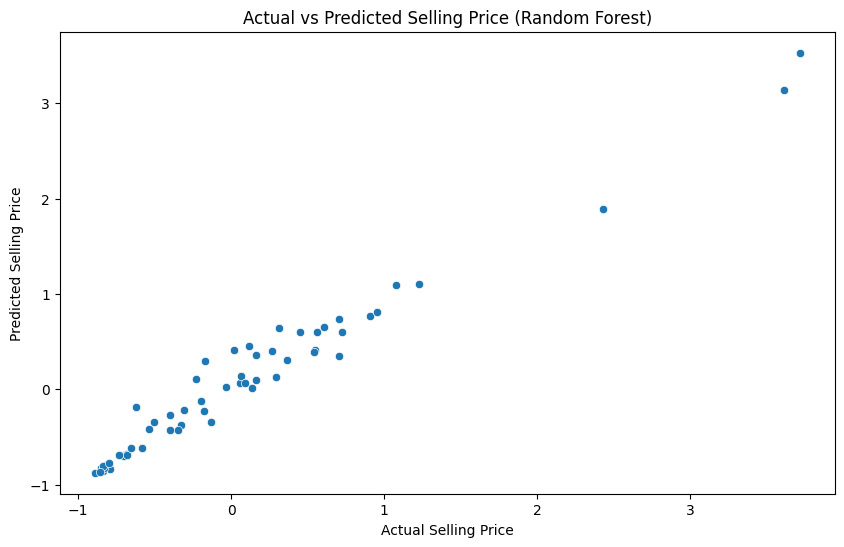

In [30]:
# Plot Actual vs Predicted for Random Forest

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Selling Price (Random Forest)")
plt.show()

# Fine-Tune the Model

In [31]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

# Grid Search
grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, scoring='r2', cv=3)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'n_estimators': 100}


# Save the Model

In [32]:
import joblib

# Save model
joblib.dump(rf_reg, "car_price_prediction_model.pkl")

# Load model
loaded_model = joblib.load("car_price_prediction_model.pkl")


# Test With New Data

In [33]:
# New data
new_data = np.array([[92,2015, 5.52, 26000, 0, 0, 1, 0, 0]])
prediction = loaded_model.predict(new_data)
print("Predicted Price:", prediction)


Predicted Price: [4.49051671]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [34]:
# New data
new_data = np.array([[68,2018, 5.55, 26000, 0, 0, 1, 0, 1]])
prediction = loaded_model.predict(new_data)
print("Predicted Price:", prediction)

Predicted Price: [3.98883781]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
